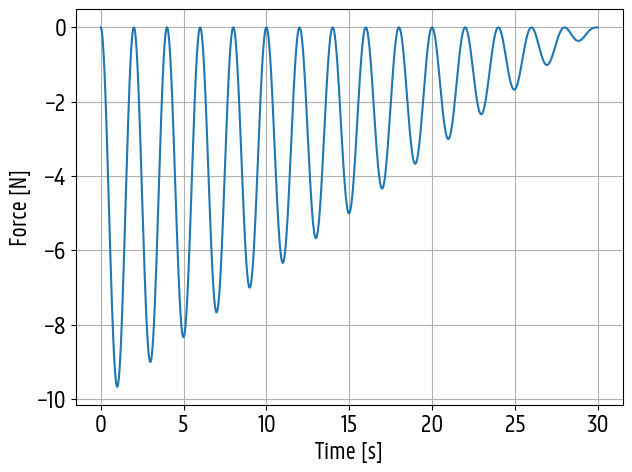

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tikzplotlib

plt.rcParams["font.family"] = "UGent Panno Text"
plt.rcParams["font.size"] = 18  

def descending_sine_wave(time, frequency, max_amplitude, phase_shift = 0, shifted=True):
    max_time = np.max(time)
    time_adjusted = time - max_time
    if shifted:
        y_values = max_amplitude / max_time / 2 * time * (np.sin(2 * np.pi * frequency * time_adjusted - np.pi/2 + phase_shift) + 1)
    else:
        y_values = max_amplitude / max_time * time * np.sin(2 * np.pi * frequency * time_adjusted - np.pi/2 + phase_shift)
        
    return y_values[::-1]



def generate_forces(frequency, max_force, length, sample_rate=200):
  force_rate = abs(max_force) / length

  time = np.linspace(0, abs(max_force) / force_rate, int(abs(max_force) / force_rate * sample_rate))  # Time values from 0 to 2 seconds

  normal_force_values = descending_sine_wave(time, frequency, max_force, 0, True)
  
  return normal_force_values

for freq in [0.5]:
  normal_force_values = generate_forces(freq, -10, 30) 
  time = np.linspace(0, 30, len(normal_force_values))


  plt.plot(time,normal_force_values)
  
plt.tight_layout()
plt.grid(True)
plt.xlabel("Time [s]")
plt.ylabel("Force [N]")

plt.savefig("plots/c3_dswex.pdf", format="pdf", bbox_inches="tight")

Text(0, 0.5, 'Force [N]')

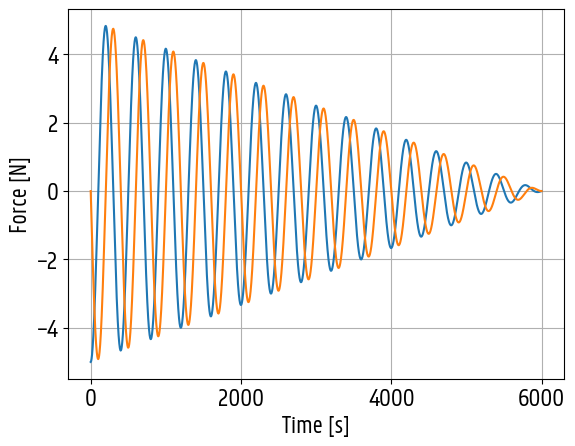

In [2]:
import numpy as np
def generate_xy_forces(frequency, max_force, length, sample_rate=200):
  force_rate = max_force / length

  time = np.linspace(0, abs(max_force) / force_rate, int(abs(max_force) / force_rate * sample_rate))  # Time values from 0 to 2 seconds

  x_force_values = descending_sine_wave(time, frequency, max_force, 0, False)
  y_force_values = descending_sine_wave(time, frequency, max_force, np.pi/2, False)
  
  return x_force_values, y_force_values

x_force_values, y_force_values = generate_xy_forces(0.5, 5, 30)

plt.plot(x_force_values)
plt.plot(y_force_values)
plt.grid(True)
plt.xlabel("Time [s]")
plt.ylabel("Force [N]")

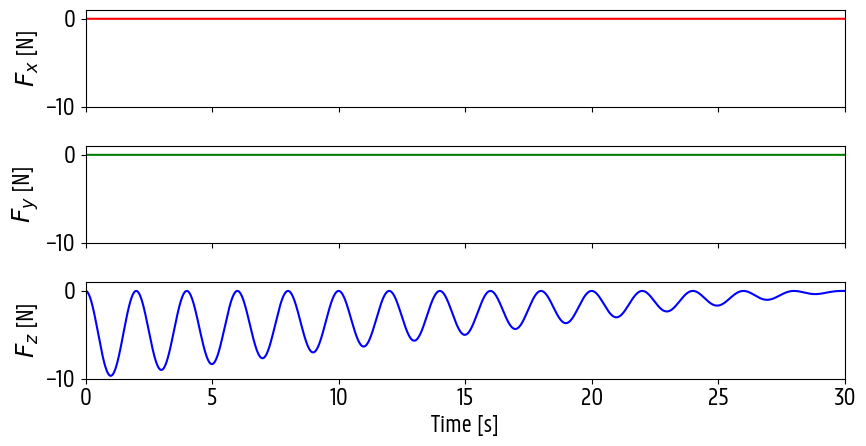

In [3]:
# Create a figure and three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(9, 4.8))

time2 = np.linspace(0, 30 + 3 + 5 + 30 + 3 + 5 + 30 + 3 + 5 + 30, 144 * 200)

# Plot data on each subplot
ax1.plot(time2, np.concatenate((np.zeros(38*200),  y_force_values, np.zeros(46*200), x_force_values)), color='red')
ax1.set_ylabel('$F_x$ [N]')

ax2.plot(time2, np.concatenate((np.zeros(38*2*200),  y_force_values, np.zeros(8*200), y_force_values)), color='green')
ax2.set_ylabel('$F_y$ [N]')

ax3.plot(time2, np.concatenate((normal_force_values, np.zeros(600),  np.ones(200*35) * -5, np.zeros(600),  np.ones(200*35) * -5, np.zeros(600),  np.ones(200*35) * -5)), color='blue')
ax3.set_ylabel('$F_z$ [N]')

plt.xlim(0, 30)
# plt.xlim(30, 30 + 38 + 38 )
# plt.xlim(144-38, 144)
# plt.xlim(144-38, 144)

plt.ylim(-10, 1)
plt.xlabel("Time [s]")

plt.tight_layout()
plt.savefig("plots/c3_dswstageI.pdf", format="pdf", bbox_inches="tight")

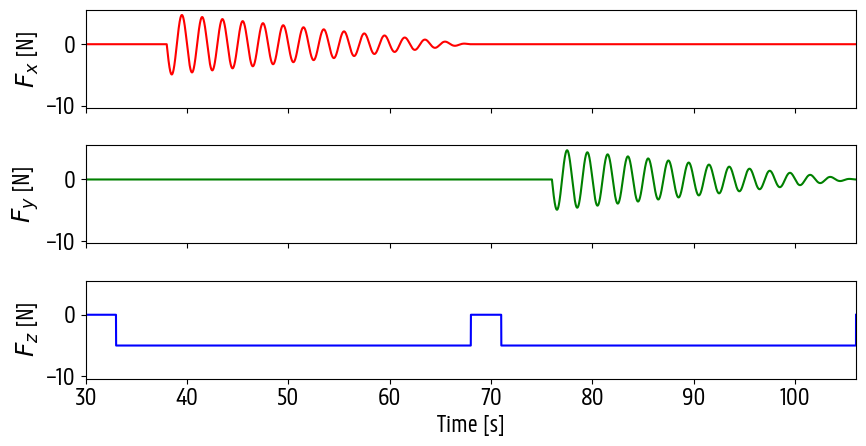

In [4]:
# Create a figure and three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(9, 4.8))

time2 = np.linspace(0, 30 + 3 + 5 + 30 + 3 + 5 + 30 + 3 + 5 + 30, 144 * 200)

# Plot data on each subplot
ax1.plot(time2, np.concatenate((np.zeros(38*200),  y_force_values, np.zeros(46*200), x_force_values)), color='red')
ax1.set_ylabel('$F_x$ [N]')

ax2.plot(time2, np.concatenate((np.zeros(38*2*200),  y_force_values, np.zeros(8*200), y_force_values)), color='green')
ax2.set_ylabel('$F_y$ [N]')

ax3.plot(time2, np.concatenate((normal_force_values, np.zeros(600),  np.ones(200*35) * -5, np.zeros(600),  np.ones(200*35) * -5, np.zeros(600),  np.ones(200*35) * -5)), color='blue')
ax3.set_ylabel('$F_z$ [N]')

# plt.xlim(0, 30)
plt.xlim(30, 30 + 38 + 38 )
# plt.xlim(144-38, 144)
# plt.xlim(144-38, 144)

plt.xlabel("Time [s]")

plt.tight_layout()

plt.tight_layout()
plt.savefig("plots/c3_dswstageII.pdf", format="pdf", bbox_inches="tight")

In [5]:
def tikzplotlib_fix_ncols(obj):
    """
    workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
    """
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    for child in obj.get_children():
        tikzplotlib_fix_ncols(child)

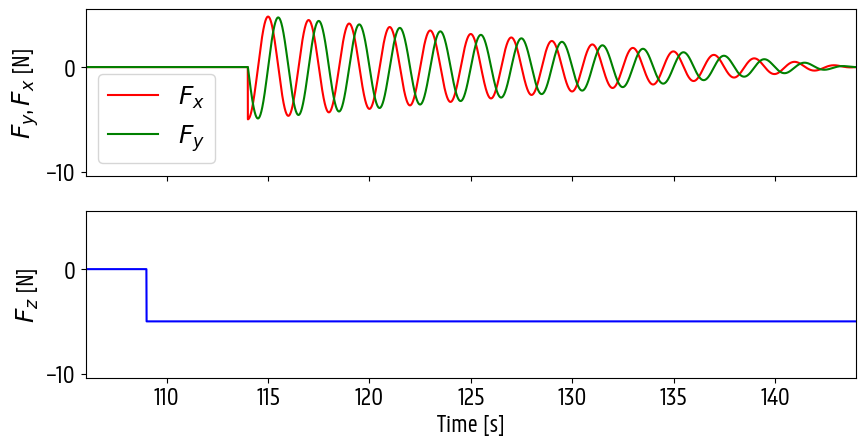

In [6]:
# Create a figure and three subplots
fig, (ax2, ax3) = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(9, 4.8))

time2 = np.linspace(0, 30 + 3 + 5 + 30 + 3 + 5 + 30 + 3 + 5 + 30, 144 * 200)

# Plot data on each subplot
ax2.plot(time2, np.concatenate((np.zeros(38*200),  y_force_values, np.zeros(46*200), x_force_values)), color='red', label='$F_x$')
ax2.set_ylabel('$F_x$ [N]')

ax2.plot(time2, np.concatenate((np.zeros(38*2*200),  y_force_values, np.zeros(8*200), y_force_values)), color='green', label='$F_y$')
ax2.set_ylabel('$F_y$, $F_x$ [N]')

ax3.plot(time2, np.concatenate((normal_force_values, np.zeros(600),  np.ones(200*35) * -5, np.zeros(600),  np.ones(200*35) * -5, np.zeros(600),  np.ones(200*35) * -5)), color='blue')
ax3.set_ylabel('$F_z$ [N]')

# plt.xlim(0, 30)
# plt.xlim(30, 30 + 38 + 38 )
# plt.xlim(144-38, 144)
plt.xlim(144-38, 144)

plt.xlabel("Time [s]")

ax2.legend()

plt.tight_layout()

plt.tight_layout()
plt.savefig("plots/c3_dswstageIV.pdf", format="pdf", bbox_inches="tight")

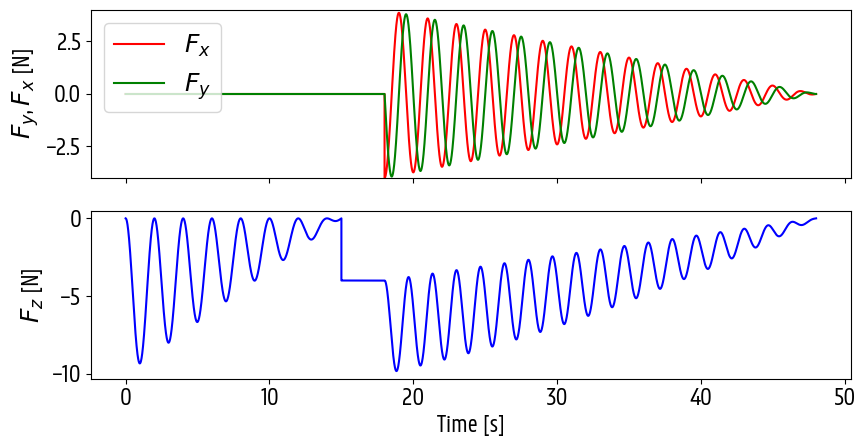

In [14]:
#
# Z component: first without xy
#

sample_rate = 200
max_force = -10
length = 15
force_rate = abs(max_force) / length

time1 = np.linspace(0, abs(max_force) / force_rate, int(abs(max_force) / force_rate * sample_rate))  # Time values from 0 to 2 seconds
normal_force_values1 = descending_sine_wave(time1, freq, max_force, 0, True)

xy_force1 = np.zeros_like(normal_force_values1)

#
# XYZ
# Z from -2 to -10
# add xy component
#

max_force = -10
length = 30
force_rate = abs(max_force) / length

time2 = np.linspace(0, abs(max_force) / force_rate, int(abs(max_force) / force_rate * sample_rate))  # Time values from 0 to 2 seconds
normal_force_values2 = descending_sine_wave(time2, 0.6, max_force, 0, True)

scaler = (1 - 0.6) / (30 - 0) * time2 + 0.6
offset = -4 + (4 - 0) / (30 - 0) * time2

# plt.plot(scaler)
# plt.show()

normal_force_values2 *= scaler
normal_force_values2 += offset

x_force = descending_sine_wave(time2, freq, 4, 0, False)
y_force = descending_sine_wave(time2, freq, 4, np.pi/2, False)


# Combine them
time = np.concatenate([time1, np.linspace(15, 18, 600), np.linspace(18, 18+abs(max_force) / force_rate, int(abs(max_force) / force_rate * sample_rate))])
normal_force_values = np.concatenate([normal_force_values1, np.ones(600) * (-4), normal_force_values2])
x_force = np.concatenate([xy_force1, np.zeros(600), x_force])
y_force = np.concatenate([xy_force1, np.zeros(600), y_force])

# Create a figure and three subplots
fig, (ax2, ax3) = plt.subplots(2, 1, sharex=True, sharey=False, figsize=(9, 4.8))

# Plot data on each subplot
ax2.plot(time, x_force, color='red', label='$F_x$')
ax2.set_ylabel('$F_x$ [N]')
ax2.set_ylim(-4, 4)

ax2.plot(time, y_force, color='green', label='$F_y$')
ax2.set_ylabel('$F_y$, $F_x$ [N]')

ax3.plot(time, normal_force_values, color='blue')
ax3.set_ylabel('$F_z$ [N]')

# plt.xlim(0, 30)
# plt.xlim(30, 30 + 38 + 38 )
# plt.xlim(144-38, 144)
# plt.xlim(144-38, 144)

plt.xlabel("Time [s]")

ax2.legend(loc='upper left')

plt.tight_layout()

plt.tight_layout()
plt.savefig("plots/c3_spiral.pdf", format="pdf", bbox_inches="tight")